2023-05-08 11:14:17.083121: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.10.0


2023-05-08 11:14:39.000012: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


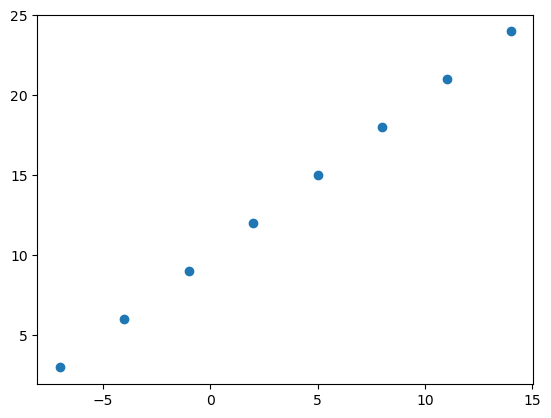

In [1]:
import tensorflow as tf
print(tf.__version__) # check the version (should be 2.x+)
import numpy as np
import matplotlib.pyplot as plt

# Create features (using tensors)
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels (using tensors)
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

# build and fit a model

In [2]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(50, activation = None),
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr = 0.01),
              metrics=["mae"])

# Fit model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # train for 100 epochs not 10

Epoch 1/100


/Users/sanghyunryu/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/1 [==============================] - 0s 417ms/step - loss: 14.9383 - mae: 14.9383
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 14.2137 - mae: 14.2137
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 13.4996 - mae: 13.4996
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 12.7943 - mae: 12.7943
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 12.0949 - mae: 12.0949
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 11.3979 - mae: 11.3979
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 10.6992 - mae: 10.6992
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 9.9945 - mae: 9.9945
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 9.2806 - mae: 9.2806
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 8.5545 - mae: 8.5545
Epoch 11/100
1/1 [==============================] - 0s 3ms/step - loss: 7.8

# Predict a model

In [3]:
# Remind ourselves of what X and y are
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [4]:
# Try and predict what y would be if X was 17.0
model.predict([14.0]) # the right answer is 27.0 (y = X + 10)

1/1 [==============================] - 0s 101ms/step


array([[23.297686]], dtype=float32)

# Evaluating a model

In [5]:
# make a bigger dataset
x = tf.range(-100,100,4)
y = x+10
x,y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

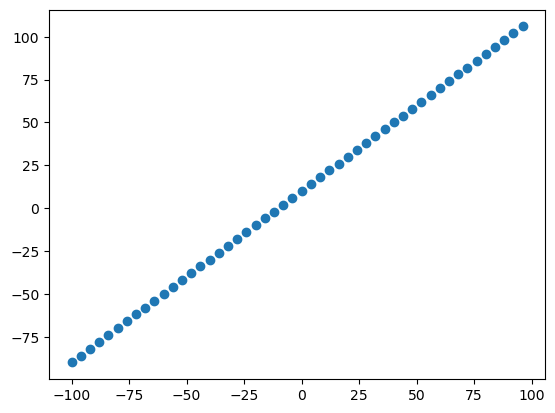

In [6]:
#visualize the data
import matplotlib.pyplot as plt
plt.scatter(x,y)

In [7]:
# split a dataset
X_train = x[:40] # 80% of the data
X_test = x[40:] # 20% of the data
y_train = y[:40]
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

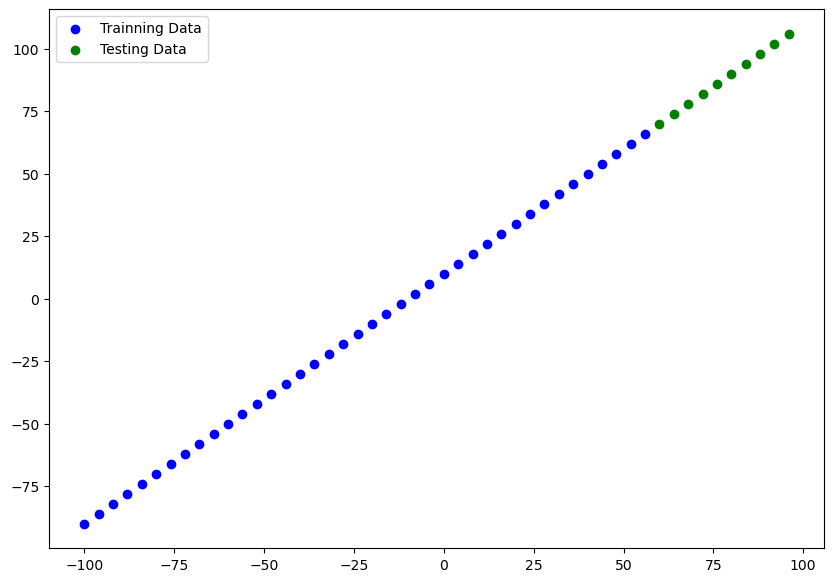

In [8]:
# visualizing the data

plt.figure(figsize = (10,7))
plt.scatter(X_train, y_train, c = 'b', label = "Trainning Data")
plt.scatter(X_test, y_test, c = 'g', label = "Testing Data")
plt.legend()

In [20]:
# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape = [1], name = 'input_layer'),
  tf.keras.layers.Dense(1, name = 'output_layer')
], name = "model_1")

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr = 0.01),
              metrics=["mae"])


In [21]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Fit model (this time we'll train for longer)
model.fit(X_train, y_train, epochs=100, verbose = 0) # train for 100 epochs not 10

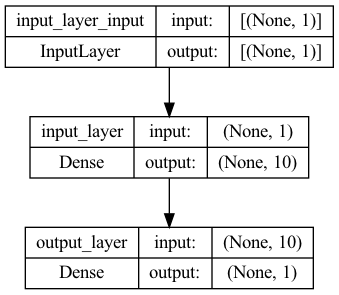

In [23]:
from tensorflow.keras.utils import plot_model

plot_model(model = model, show_shapes= True)

In [24]:
# Visualizing our model's predcitions

y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 61ms/step


array([[ 68.17131 ],
       [ 72.0576  ],
       [ 75.9439  ],
       [ 79.83019 ],
       [ 83.71649 ],
       [ 87.60279 ],
       [ 91.48909 ],
       [ 95.375404],
       [ 99.26169 ],
       [103.14799 ]], dtype=float32)

In [25]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

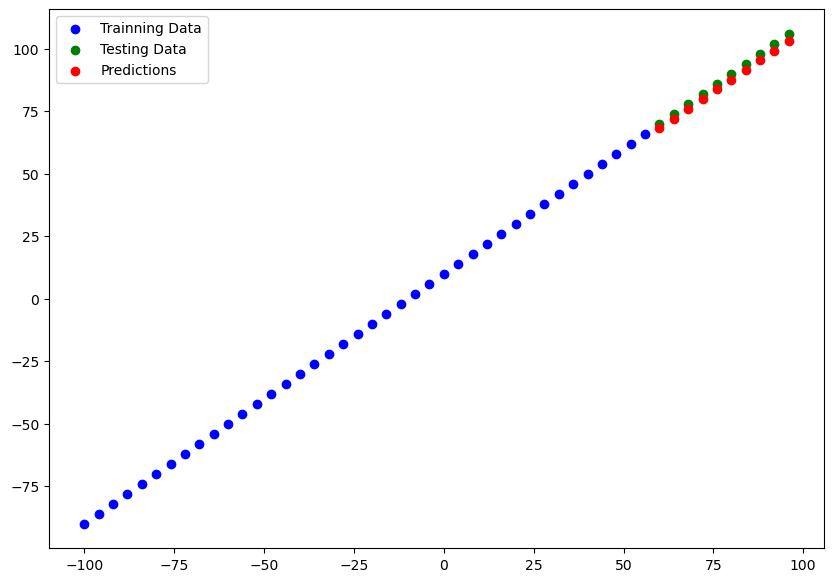

In [29]:
# creating ploting function

def plot_predcitions(train_data = X_train, train_labels = y_train, test_data = X_test, test_labels = y_test, predictions = y_pred):

    plt.figure(figsize = (10,7))
    plt.scatter(train_data, train_labels, c = 'b', label = "Trainning Data")
    plt.scatter(test_data, test_labels, c = 'g', label = "Testing Data")
    plt.scatter(test_data, predictions, c = 'r', label = "Predictions")
    plt.legend()

plot_predcitions(X_train, y_train,X_test,y_test,y_pred)
    

# Evaluating our model's predictions with regression evaluation metrics

* MAE - mean absolute error, " on average, how wrong is each of my model's predcitions
* MSE - mean squared error, "square average error"